In [298]:
import pandas as pd
import plotnine as pn

In [299]:
df_at_least_six_or_at_most_two = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_six_or_at_most_two/num_states=7/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

In [300]:
df_at_least_four = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_four/num_states=5/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

In [301]:
df_at_most_three = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_most_three/num_states=5/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

In [302]:
df_first_three = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=first_three/num_states=5/epochs=4000/batch_size=3/lr=0.001/losses.csv")

In [303]:
df_at_least_three = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_three/num_states=4/epochs=4000/batch_size=3/lr=0.001/losses.csv")

In [304]:
# one 'loss' df
df_curves = pd.DataFrame(
    zip(
        pd.concat([df["train_losses"], df["test_losses"]]),
        pd.concat([df["train_accuracies"], df["test_accuracies"]]),
        ["train"] * len(df) + ["test"] * len(df),
        pd.concat([df["epoch"], df["epoch"]])
    ),
    columns=["loss", "accuracy", "set", "epoch"],
    )
df_curves

,loss,accuracy,set,epoch
0,0.693152,0.517691,train,1
1,0.693132,0.517691,train,2
2,0.693109,0.517691,train,3
3,0.693091,0.517691,train,4
4,0.693084,0.517691,train,5
...,...,...,...,...
26625,0.216663,0.961039,test,3996
26626,0.216689,0.961039,test,3997
26627,0.216662,0.961039,test,3998
26628,0.216646,0.961039,test,3999


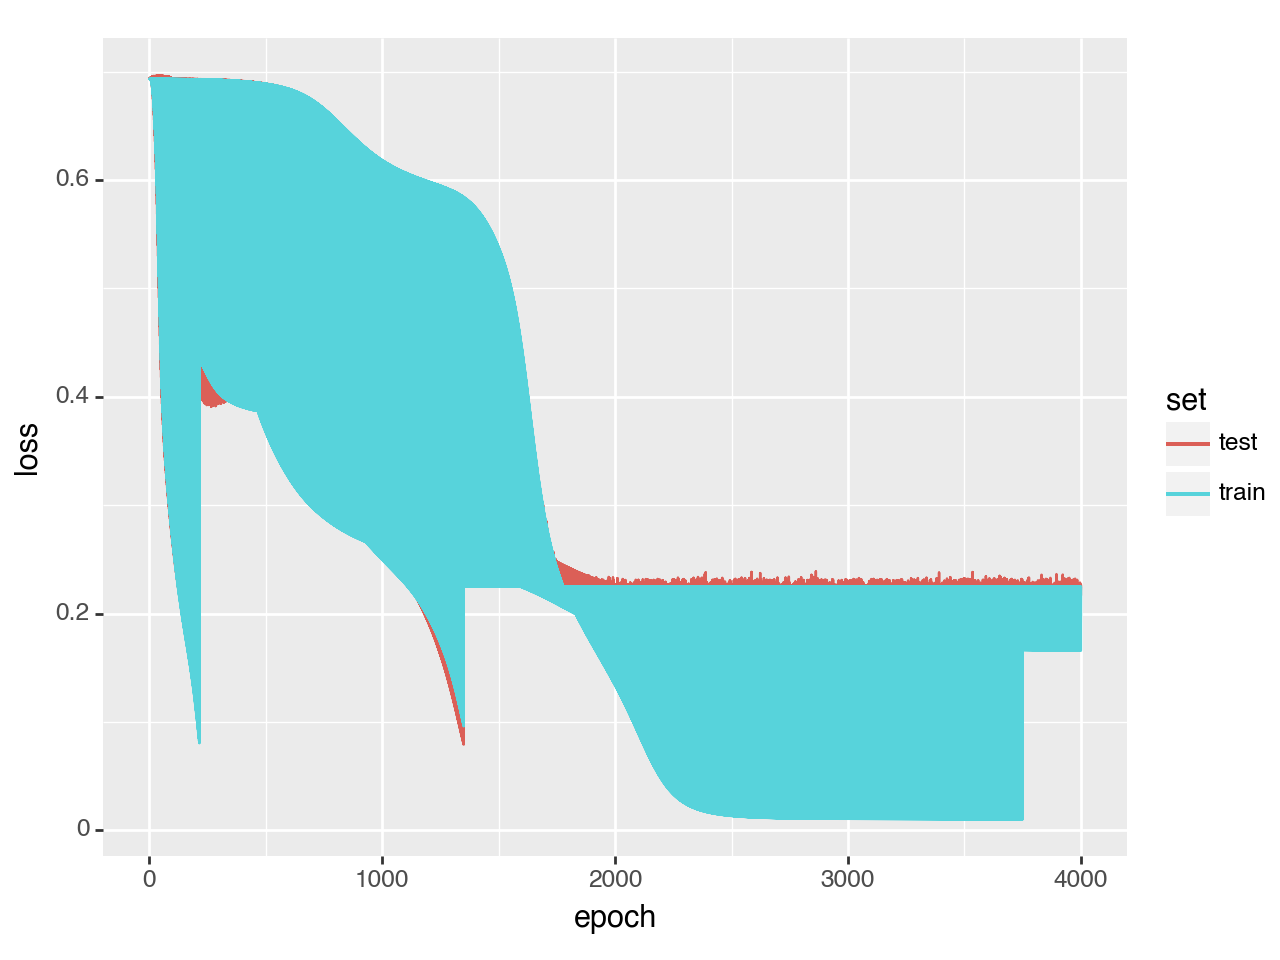

<Figure Size: (640 x 480)>

In [305]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

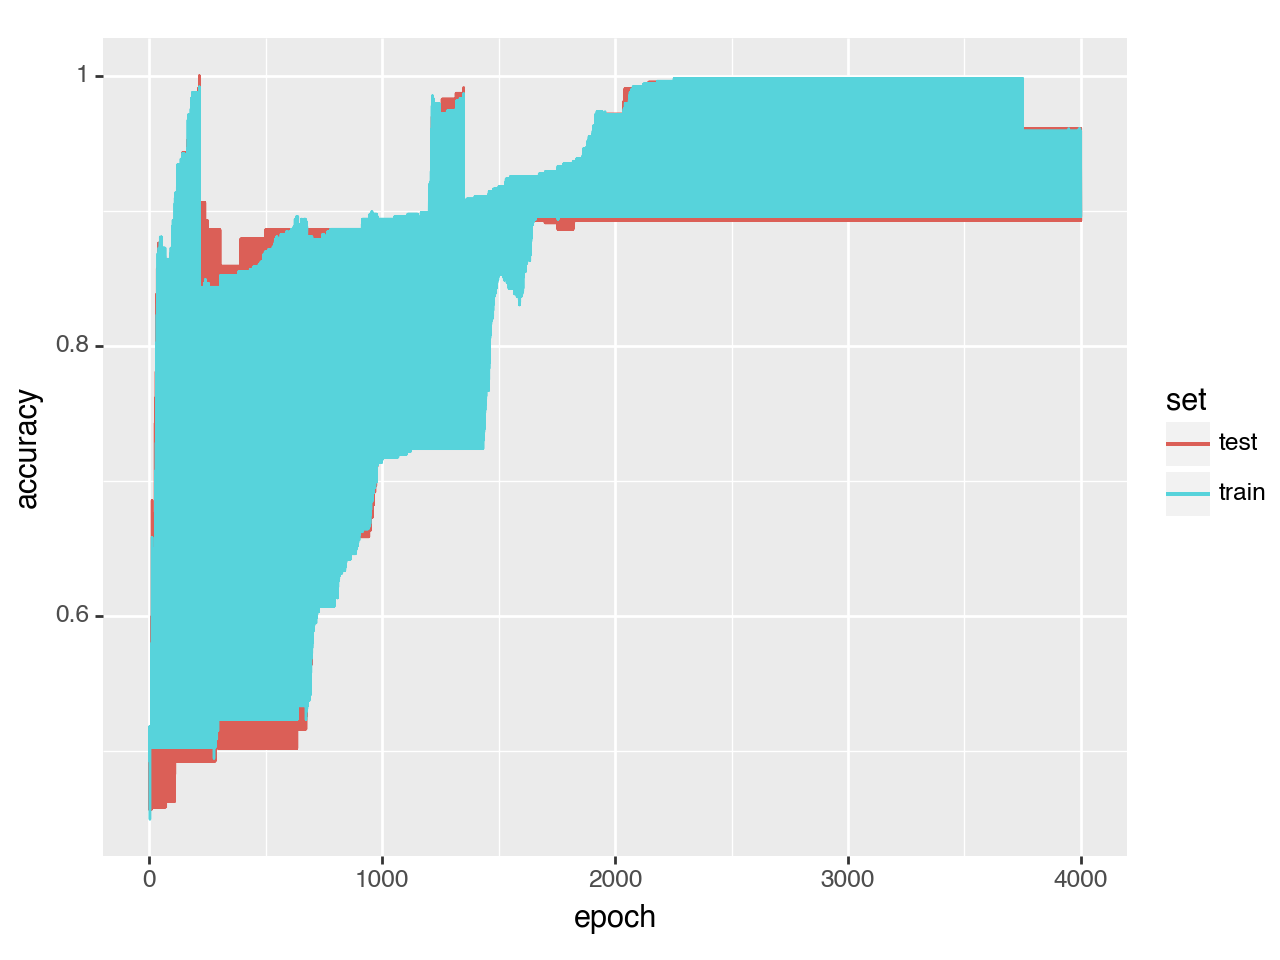

<Figure Size: (640 x 480)>

In [306]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="set"))
    # + pn.ylim(0.4,1)
)

In [307]:
# combine the interesting dfs
df_at_least_six_or_at_most_two["quantifier"] = "at_least_6_or_at_most_2"
df_at_least_four["quantifier"] = "at_least_4"
df_at_least_three["quantifier"] = "at_least_3"
df_at_most_three["quantifier"] = "at_most_3"
df_first_three["quantifier"] = "first_3"

df = pd.concat([
    df_at_least_four, 
    df_at_least_six_or_at_most_two,
    df_at_least_three,
    df_first_three,
    df_at_most_three,    
    ])
df

,train_losses,train_accuracies,test_losses,test_accuracies,epoch,quantifier
0,0.693152,0.517691,0.693195,0.458874,1,at_least_4
1,0.693132,0.517691,0.693252,0.458874,2,at_least_4
2,0.693109,0.517691,0.693282,0.458874,3,at_least_4
3,0.693091,0.517691,0.693320,0.458874,4,at_least_4
4,0.693084,0.517691,0.693353,0.458874,5,at_least_4
...,...,...,...,...,...,...
3995,0.165902,0.960894,0.216663,0.961039,3996,at_most_3
3996,0.165893,0.959032,0.216689,0.961039,3997,at_most_3
3997,0.165888,0.959032,0.216662,0.961039,3998,at_most_3
3998,0.165889,0.959032,0.216646,0.961039,3999,at_most_3


In [308]:
def get_curves_df(data):
    # one 'curves' df
    df_curves = pd.DataFrame(
        zip(
            pd.concat([data["train_losses"], data["test_losses"]]),
            pd.concat([data["train_accuracies"], data["test_accuracies"]]),
            ["train"] * len(data) + ["test"] * len(data),
            pd.concat([data["epoch"], data["epoch"]]),
            pd.concat([data["quantifier"], data["quantifier"]]),
        ),
        columns=["loss", "accuracy", "set", "epoch", "quantifier"],
        )
    return df_curves


df_curves = pd.concat([get_curves_df(df) for df in [
    df_at_least_four, 
    df_at_least_six_or_at_most_two,
    df_at_least_three,
    df_first_three,
    df_at_most_three,       
    ]
])
df_curves

,loss,accuracy,set,epoch,quantifier
0,0.693152,0.517691,train,1,at_least_4
1,0.693132,0.517691,train,2,at_least_4
2,0.693109,0.517691,train,3,at_least_4
3,0.693091,0.517691,train,4,at_least_4
4,0.693084,0.517691,train,5,at_least_4
...,...,...,...,...,...
7995,0.216663,0.961039,test,3996,at_most_3
7996,0.216689,0.961039,test,3997,at_most_3
7997,0.216662,0.961039,test,3998,at_most_3
7998,0.216646,0.961039,test,3999,at_most_3


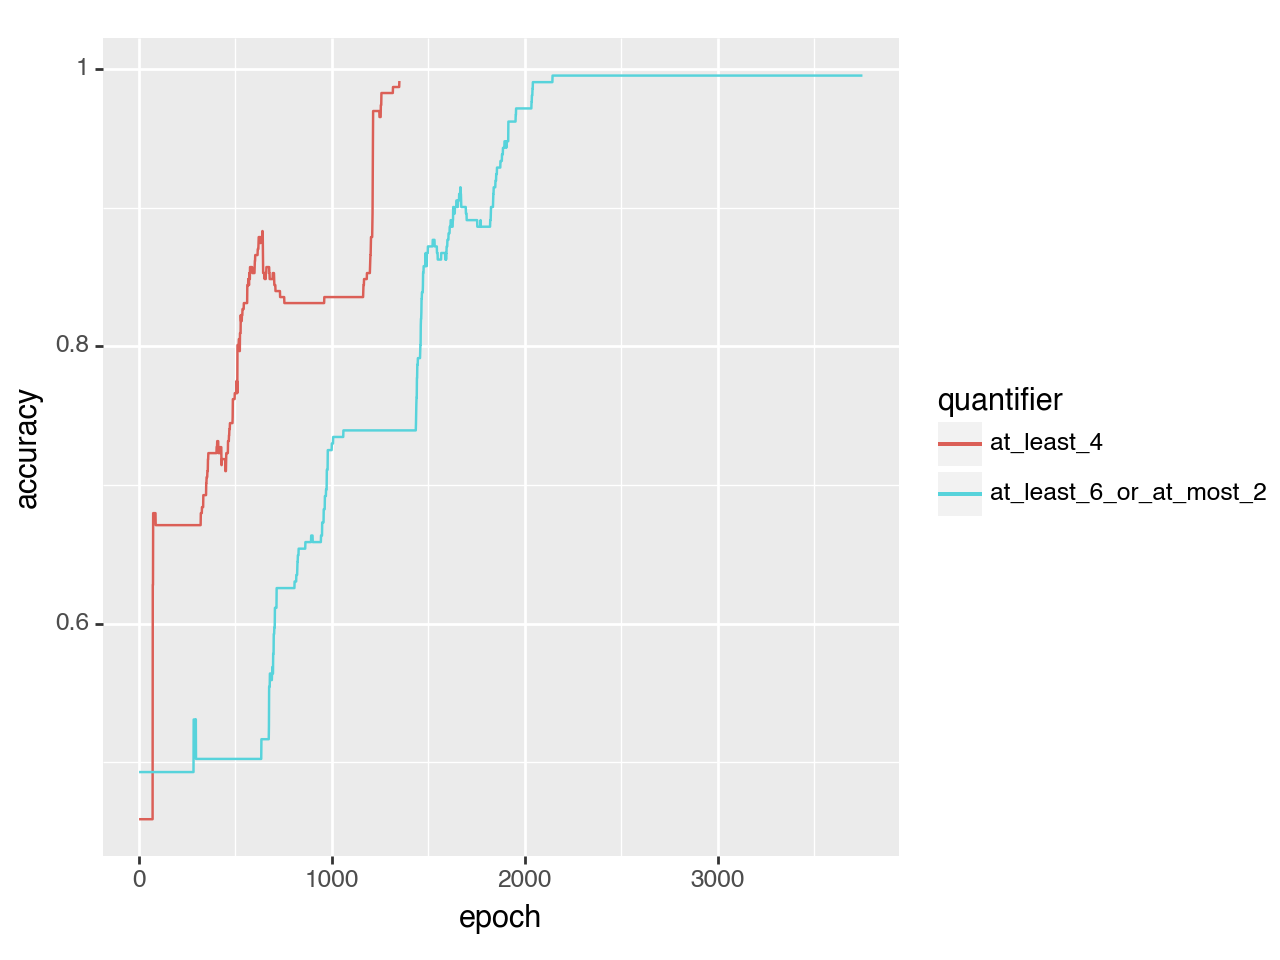

<Figure Size: (640 x 480)>

In [309]:
df_1a = df_curves[df_curves["set"] == "test"]
df_1a = df_1a[df_1a["quantifier"].isin(["at_least_4", "at_least_6_or_at_most_2"])]

(
    pn.ggplot(df_1a, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
).save("curves_1a", width=6, height=6, dpi=300,)

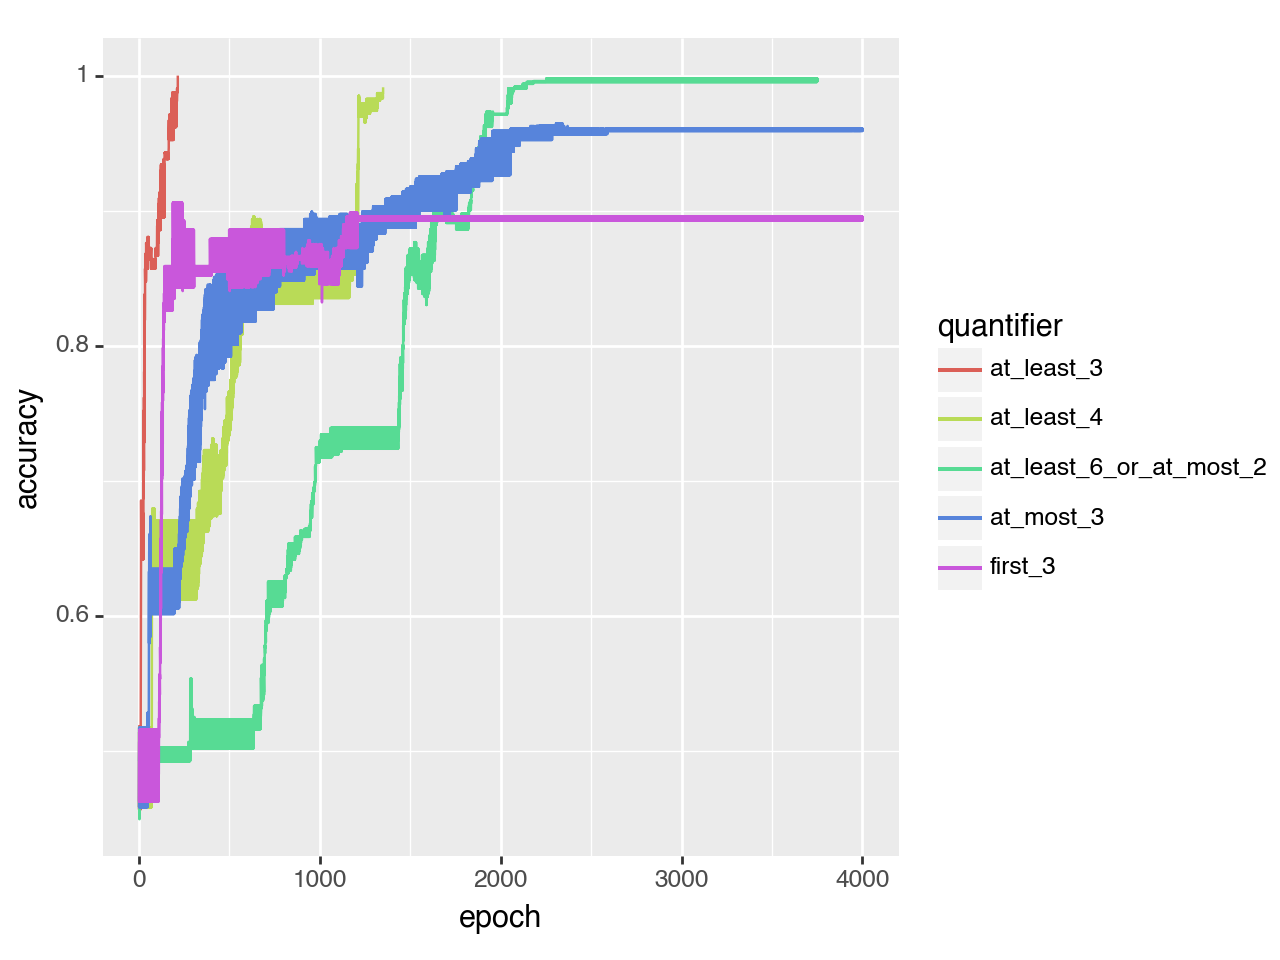

<Figure Size: (640 x 480)>

In [311]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
)

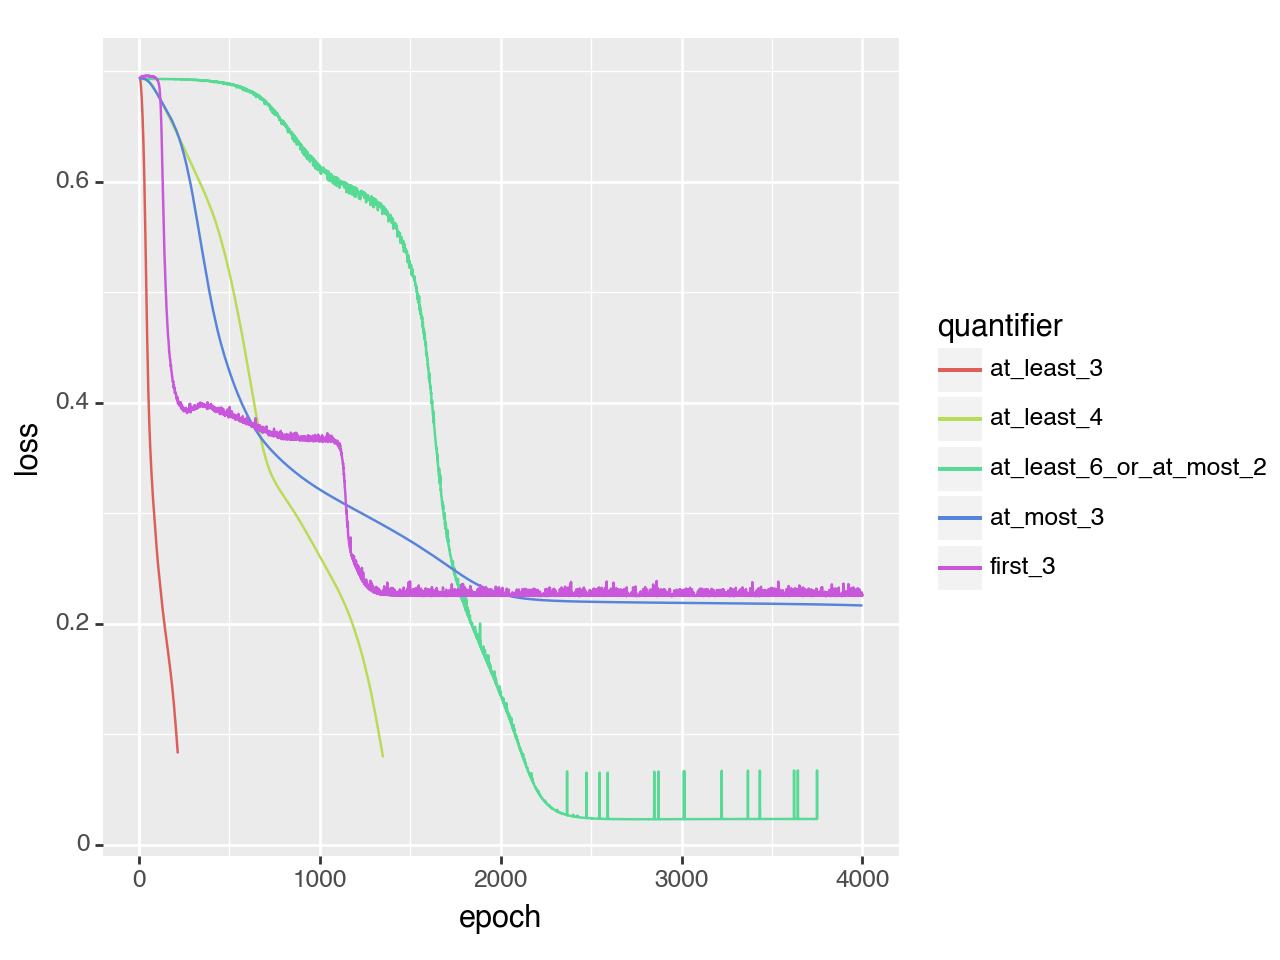

<Figure Size: (640 x 480)>

In [312]:
(
    pn.ggplot(df_curves[df_curves["set"] == "test"], pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
)

In [313]:
# t-test



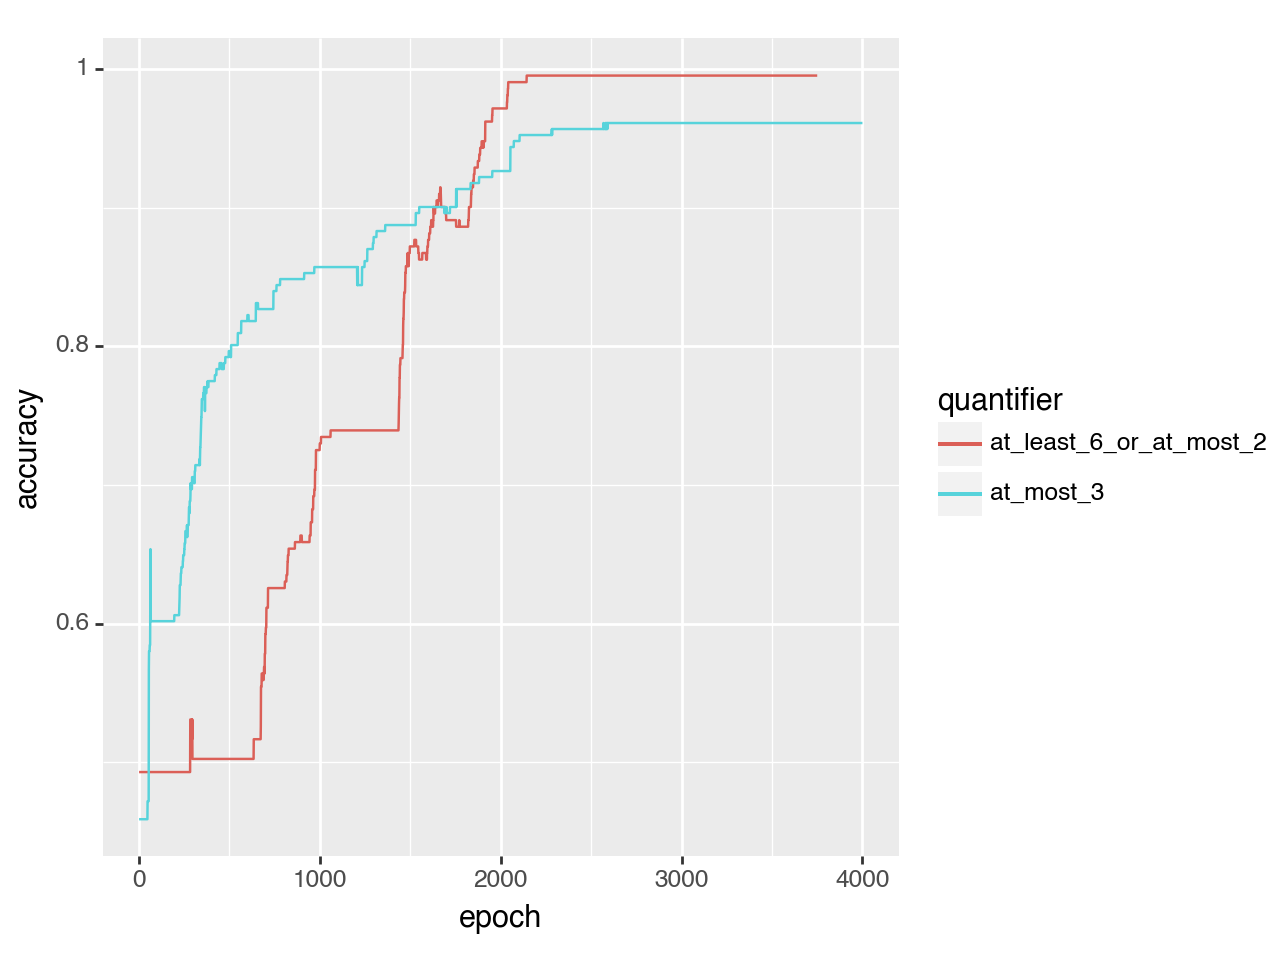

<Figure Size: (640 x 480)>

In [314]:
df_1b = df_curves[df_curves["set"] == "test"]
df_1b = df_1b[df_1b["quantifier"].isin(["at_most_3", "at_least_6_or_at_most_2"])]

(
    pn.ggplot(df_1b, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
).save("curves_1b", width=6, height=6, dpi=300,)

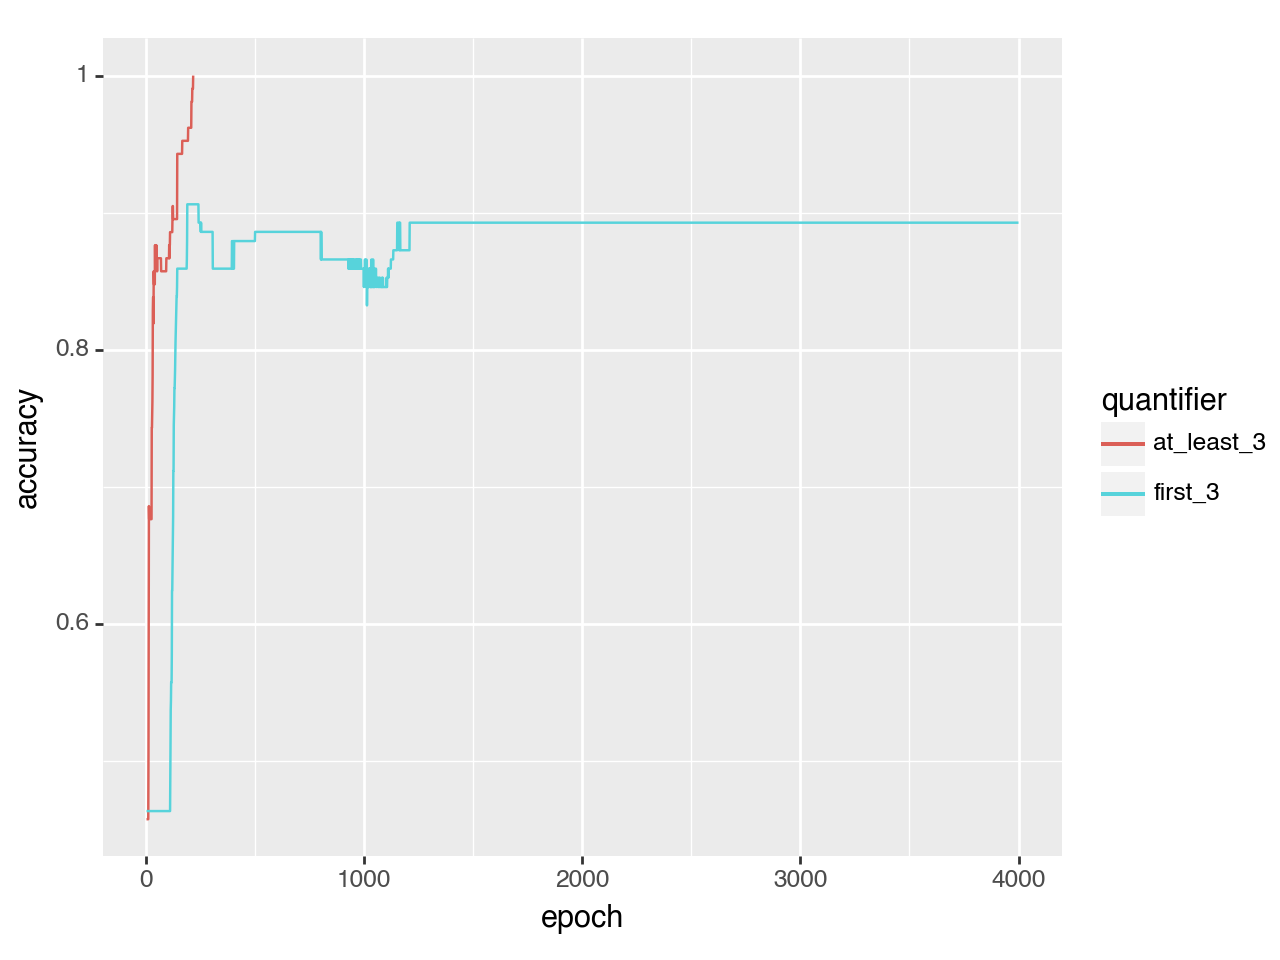

<Figure Size: (640 x 480)>

In [315]:
df_2a = df_curves[df_curves["set"] == "test"]
df_2a = df_2a[df_2a["quantifier"].isin(["at_least_3", "first_3"])]

(
    pn.ggplot(df_2a, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
).save("curves_2a", width=6, height=6, dpi=300,)